In [1]:
import numpy as np

class RBFModel:
    """
    A class to implement a Function Value based Radial Basis Function model 
    (FV-RBF)
    """

    def __init__(self, X, y, C=None):
        """
        Constructor for the RBF model.

        Parameters:
        X : np.ndarray
            Input data with shape (n_samples, n_features).
        y : np.ndarray
            Target data with shape (n_samples, ).
        C : np.ndarray, optional
            Centres for the RBF model, default is X. Shape: (n_centres, n_features).
        """
        self.X = X
        self.y = y
        self.C = X if C is None else C

        self._n_samples, self._n_features = self.X.shape
        self._n_centres = self.C.shape[0]
        
        return
    
    def FV_fit(self, epsi=1):
            """
            Fit the Function Value Radial Basis Function (FV-RBF) model.
    
            Parameters:
            epsi : float, optional
                The shape parameter for the RBF. Default is 1.
            """
            self.epsi = epsi
            
            from scipy.spatial.distance import cdist
            # Calculate the distance between each pair of points
            dist_matrix = cdist(self.X, self.C, metric='euclidean')
    
            # Calculate the RBF kernel matrix using the Gaussian basis function
            kernel_matrix = np.exp(-self.epsi * (dist_matrix ** 2))
    
            # Solve the linear system to find the coefficients/weigths
            if self._n_centres == self._n_samples: #interpolation fit
                self.coefficients = np.linalg.solve(kernel_matrix, self.y)
                
            else: # regression fit
                self.coefficients = np.linalg.solve(kernel_matrix.T @ kernel_matrix, 
                                                    kernel_matrix.T @ self.y)

            return
        
    def __call__(self, Xnew):
        """
        Predict using the RBF model.

        Parameters:
        Xnew : np.ndarray
           New points for prediction. Shape: (n_samples, n_features).

        Returns:
        y_pred : np.ndarray
            Predicted output. Shape: (n_samples, 1).
        """
        # Calculate the distance between each input point and the 
        # centres of the model
        from scipy.spatial.distance import cdist
        dist_matrix = cdist(Xnew, self.C, metric='euclidean')

        # Calculate the RBF kernel matrix
        kernel_matrix = np.exp(-self.epsi * (dist_matrix ** 2))

        # Calculate the predicted output
        y_pred = kernel_matrix @ self.coefficients

        return y_pred

<IPython.core.display.Javascript object>


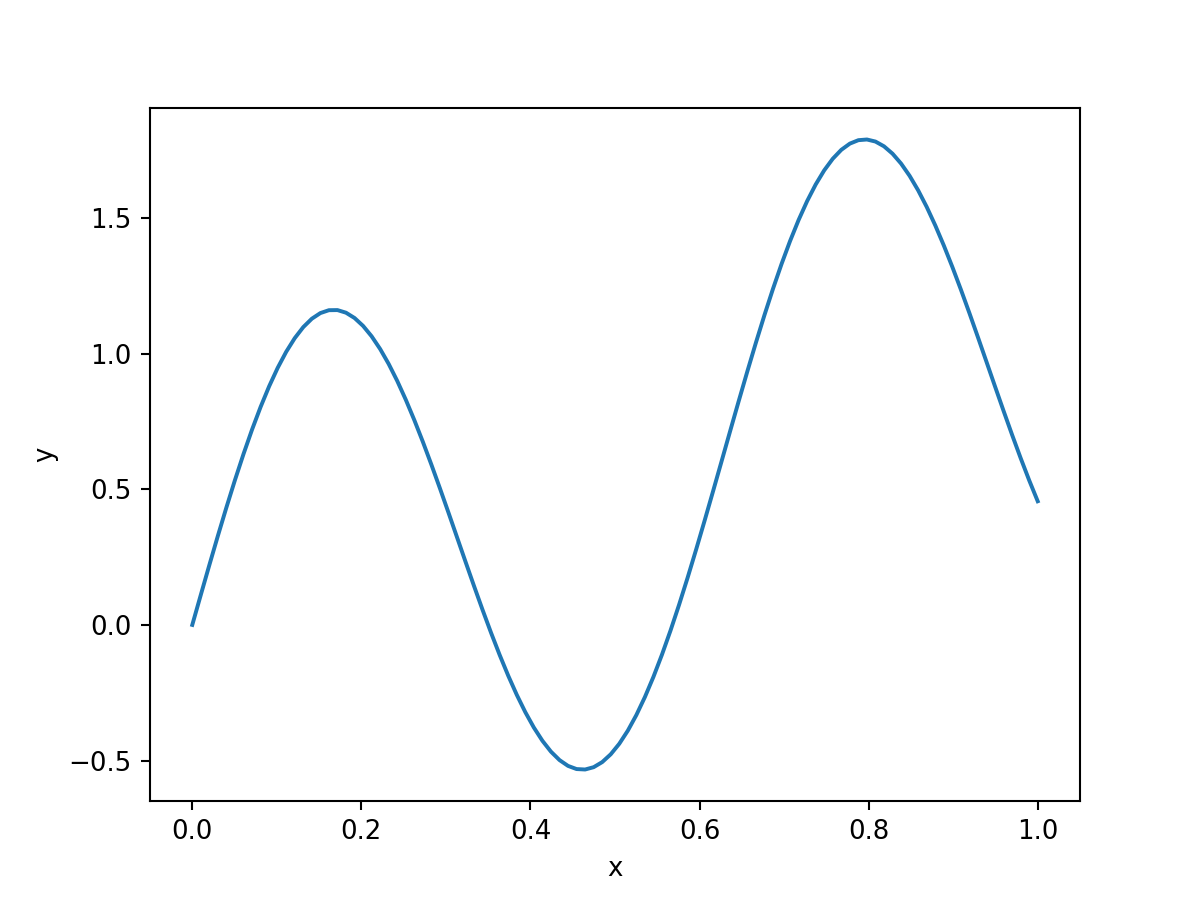

Text(0, 0.5, 'y')

In [2]:
%matplotlib notebook

import matplotlib.pyplot as plt
def Example(x):
    
    return np.sin(10*x) + x

X = np.linspace(0, 1, 100).reshape(-1,1)
y = Example(X)


plt.plot(X, y)
plt.xlabel('x')
plt.ylabel('y')

<IPython.core.display.Javascript object>


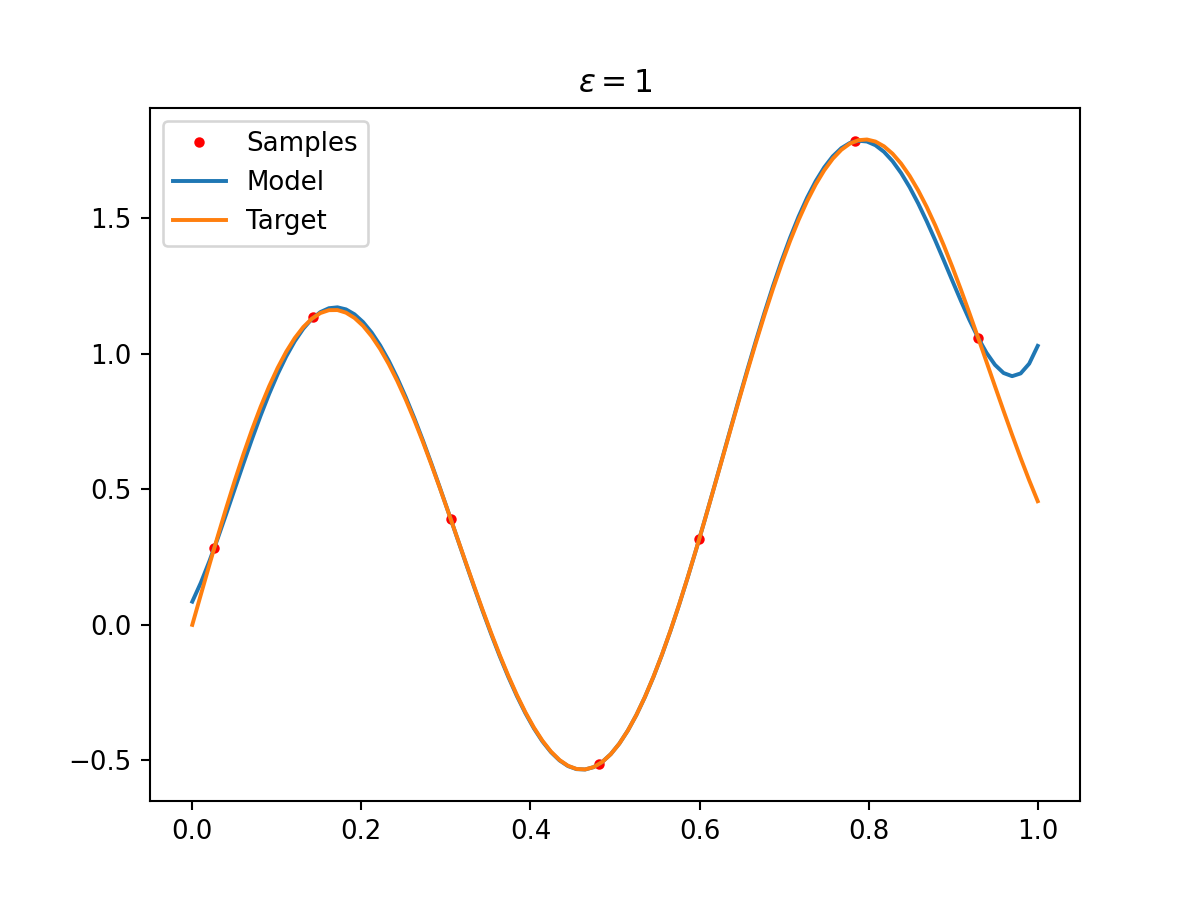

In [4]:
from pyDOE import lhs
X = lhs(1, 7, criterion='m')
y = Example(X)

model = RBFModel(X, y)
model.FV_fit(epsi = 1)

X_pred = np.linspace(0, 1, 100).reshape(-1,1)
y_pred = model(X_pred)

X_actual = np.linspace(0, 1, 100).reshape(-1,1)
y_actual = Example(X_actual)

plt.figure()
plt.title('$\epsilon = 1$')
plt.plot(X, y, 'r.', label = 'Samples')
plt.plot(X_pred, y_pred, label ='Model')
plt.plot(X_actual, y_actual, label ='Target')

plt.legend()

<IPython.core.display.Javascript object>


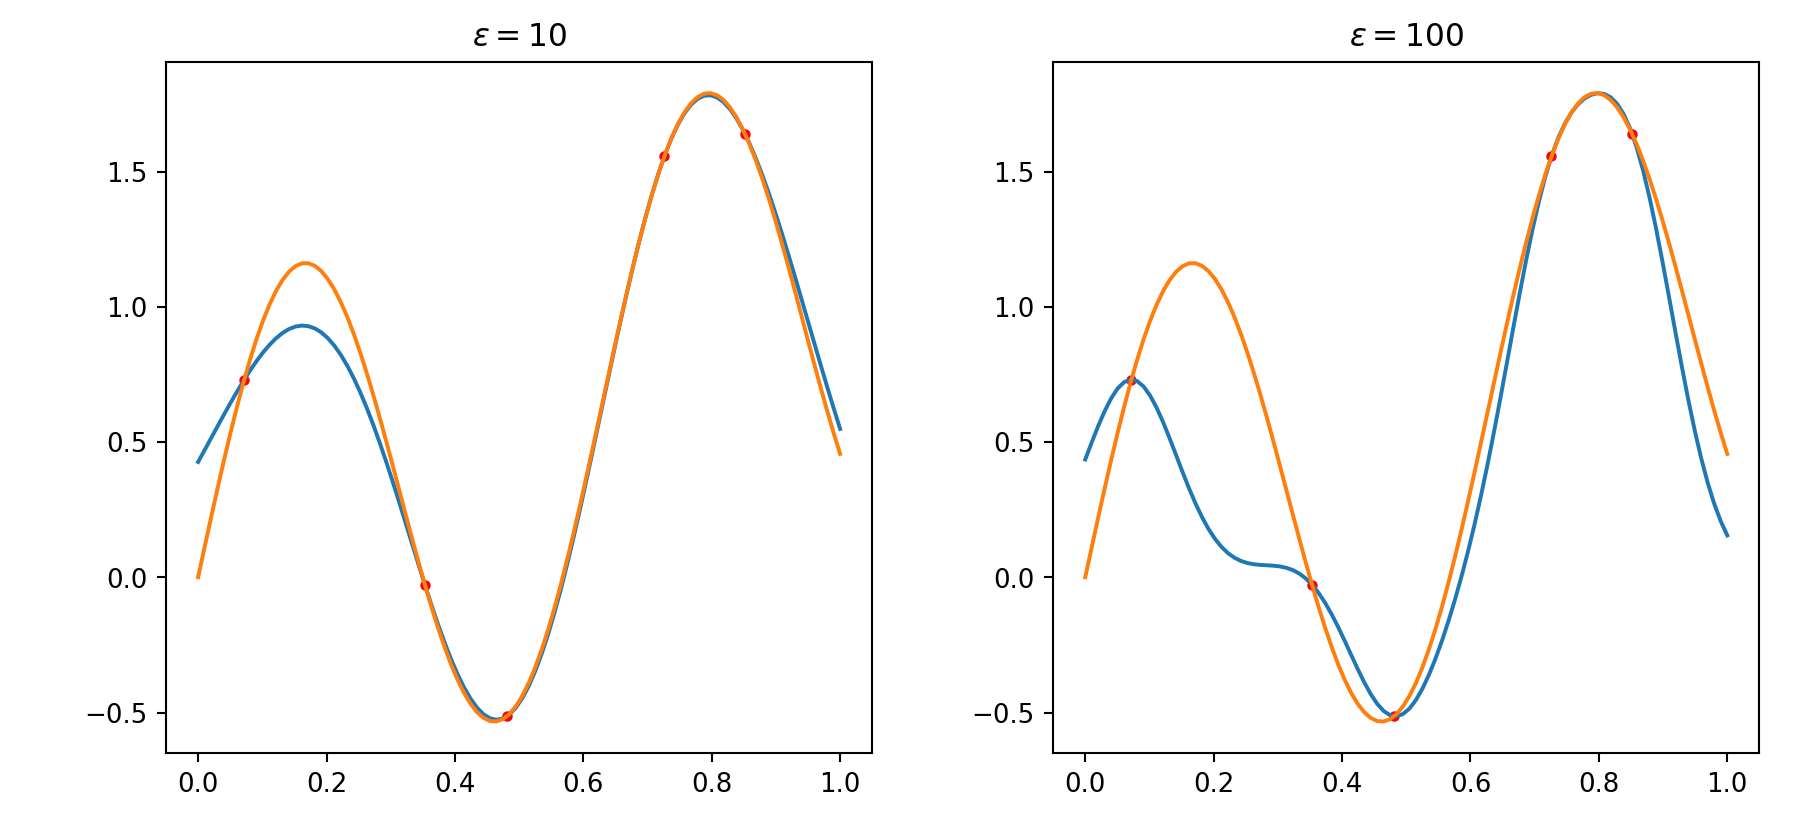

In [8]:
fig, ax = plt.subplots(1,2)

X = lhs(1, 5, criterion='m')
y = Example(X)

for i,epsi in enumerate([10, 100]):
    
    model = RBFModel(X, y)
    model.FV_fit(epsi = epsi)

    X_pred = np.linspace(0, 1, 100).reshape(-1,1)
    y_pred = model(X_pred)

    X_actual = np.linspace(0, 1, 100).reshape(-1,1)
    y_actual = Example(X_actual)

    ax[i].set_title(f'$\epsilon = {epsi}$')
    ax[i].plot(X, y, 'r.', label = 'Samples')
    ax[i].plot(X_pred, y_pred, label ='Model')
    ax[i].plot(X_actual, y_actual, label ='Target')

fig.tight_layout()

In [8]:
i

0